In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Load metadata
metadata_path = r'F:\JHU\FALL2024\Pytorch\explainable_skinlesion_classification\HAM10000\HAM10000_metadata.csv'
df = pd.read_csv(metadata_path)
print(df.head())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [5]:
# Check missing values
print(df.info())  
print(df.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


C:\Users\carin\AppData\Local\Temp\ipykernel_50804\3112095590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index, palette='viridis')


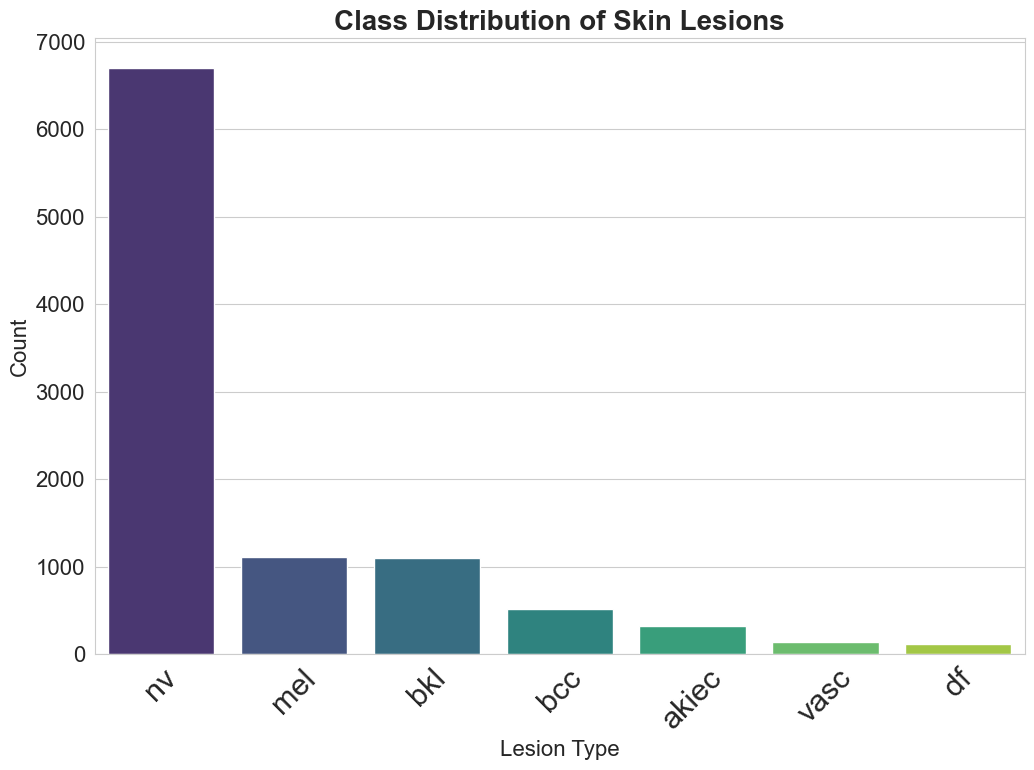

In [15]:
# Countplot for class distribution
plt.figure(figsize=(12, 8))  
sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index, palette='viridis')


plt.title('Class Distribution of Skin Lesions', fontsize=20, fontweight='bold')  
plt.xlabel('Lesion Type', fontsize=16)  
plt.ylabel('Count', fontsize=16)  
plt.xticks(rotation=45, fontsize=22)  
plt.yticks(fontsize=16)  

# Show the plot
plt.show()


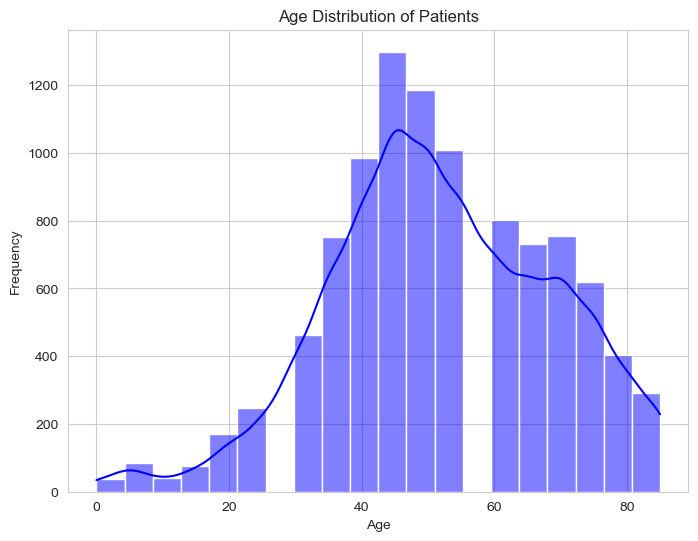

In [4]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


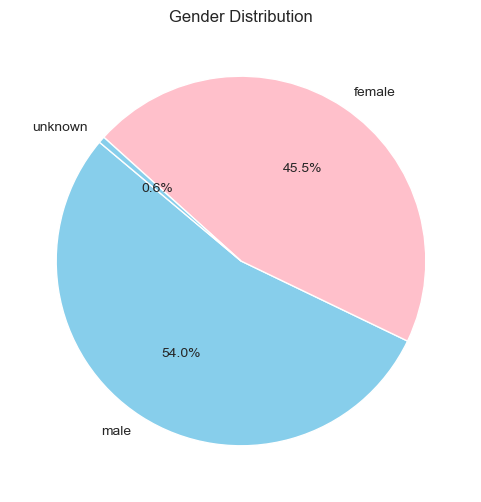

In [5]:
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


C:\Users\carin\AppData\Local\Temp\ipykernel_50804\3581175335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='localization', data=df, order=df['localization'].value_counts().index, palette='magma')


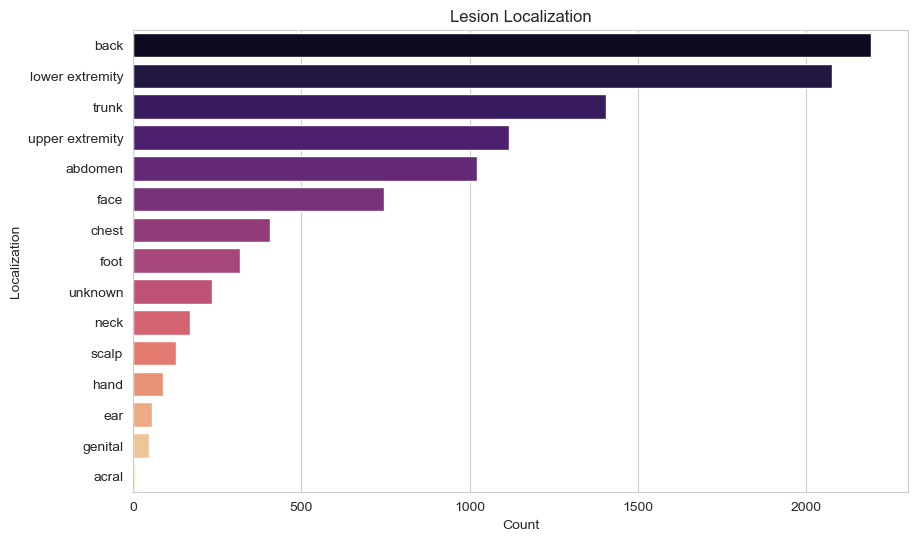

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(y='localization', data=df, order=df['localization'].value_counts().index, palette='magma')
plt.title('Lesion Localization')
plt.xlabel('Count')
plt.ylabel('Localization')
plt.show()


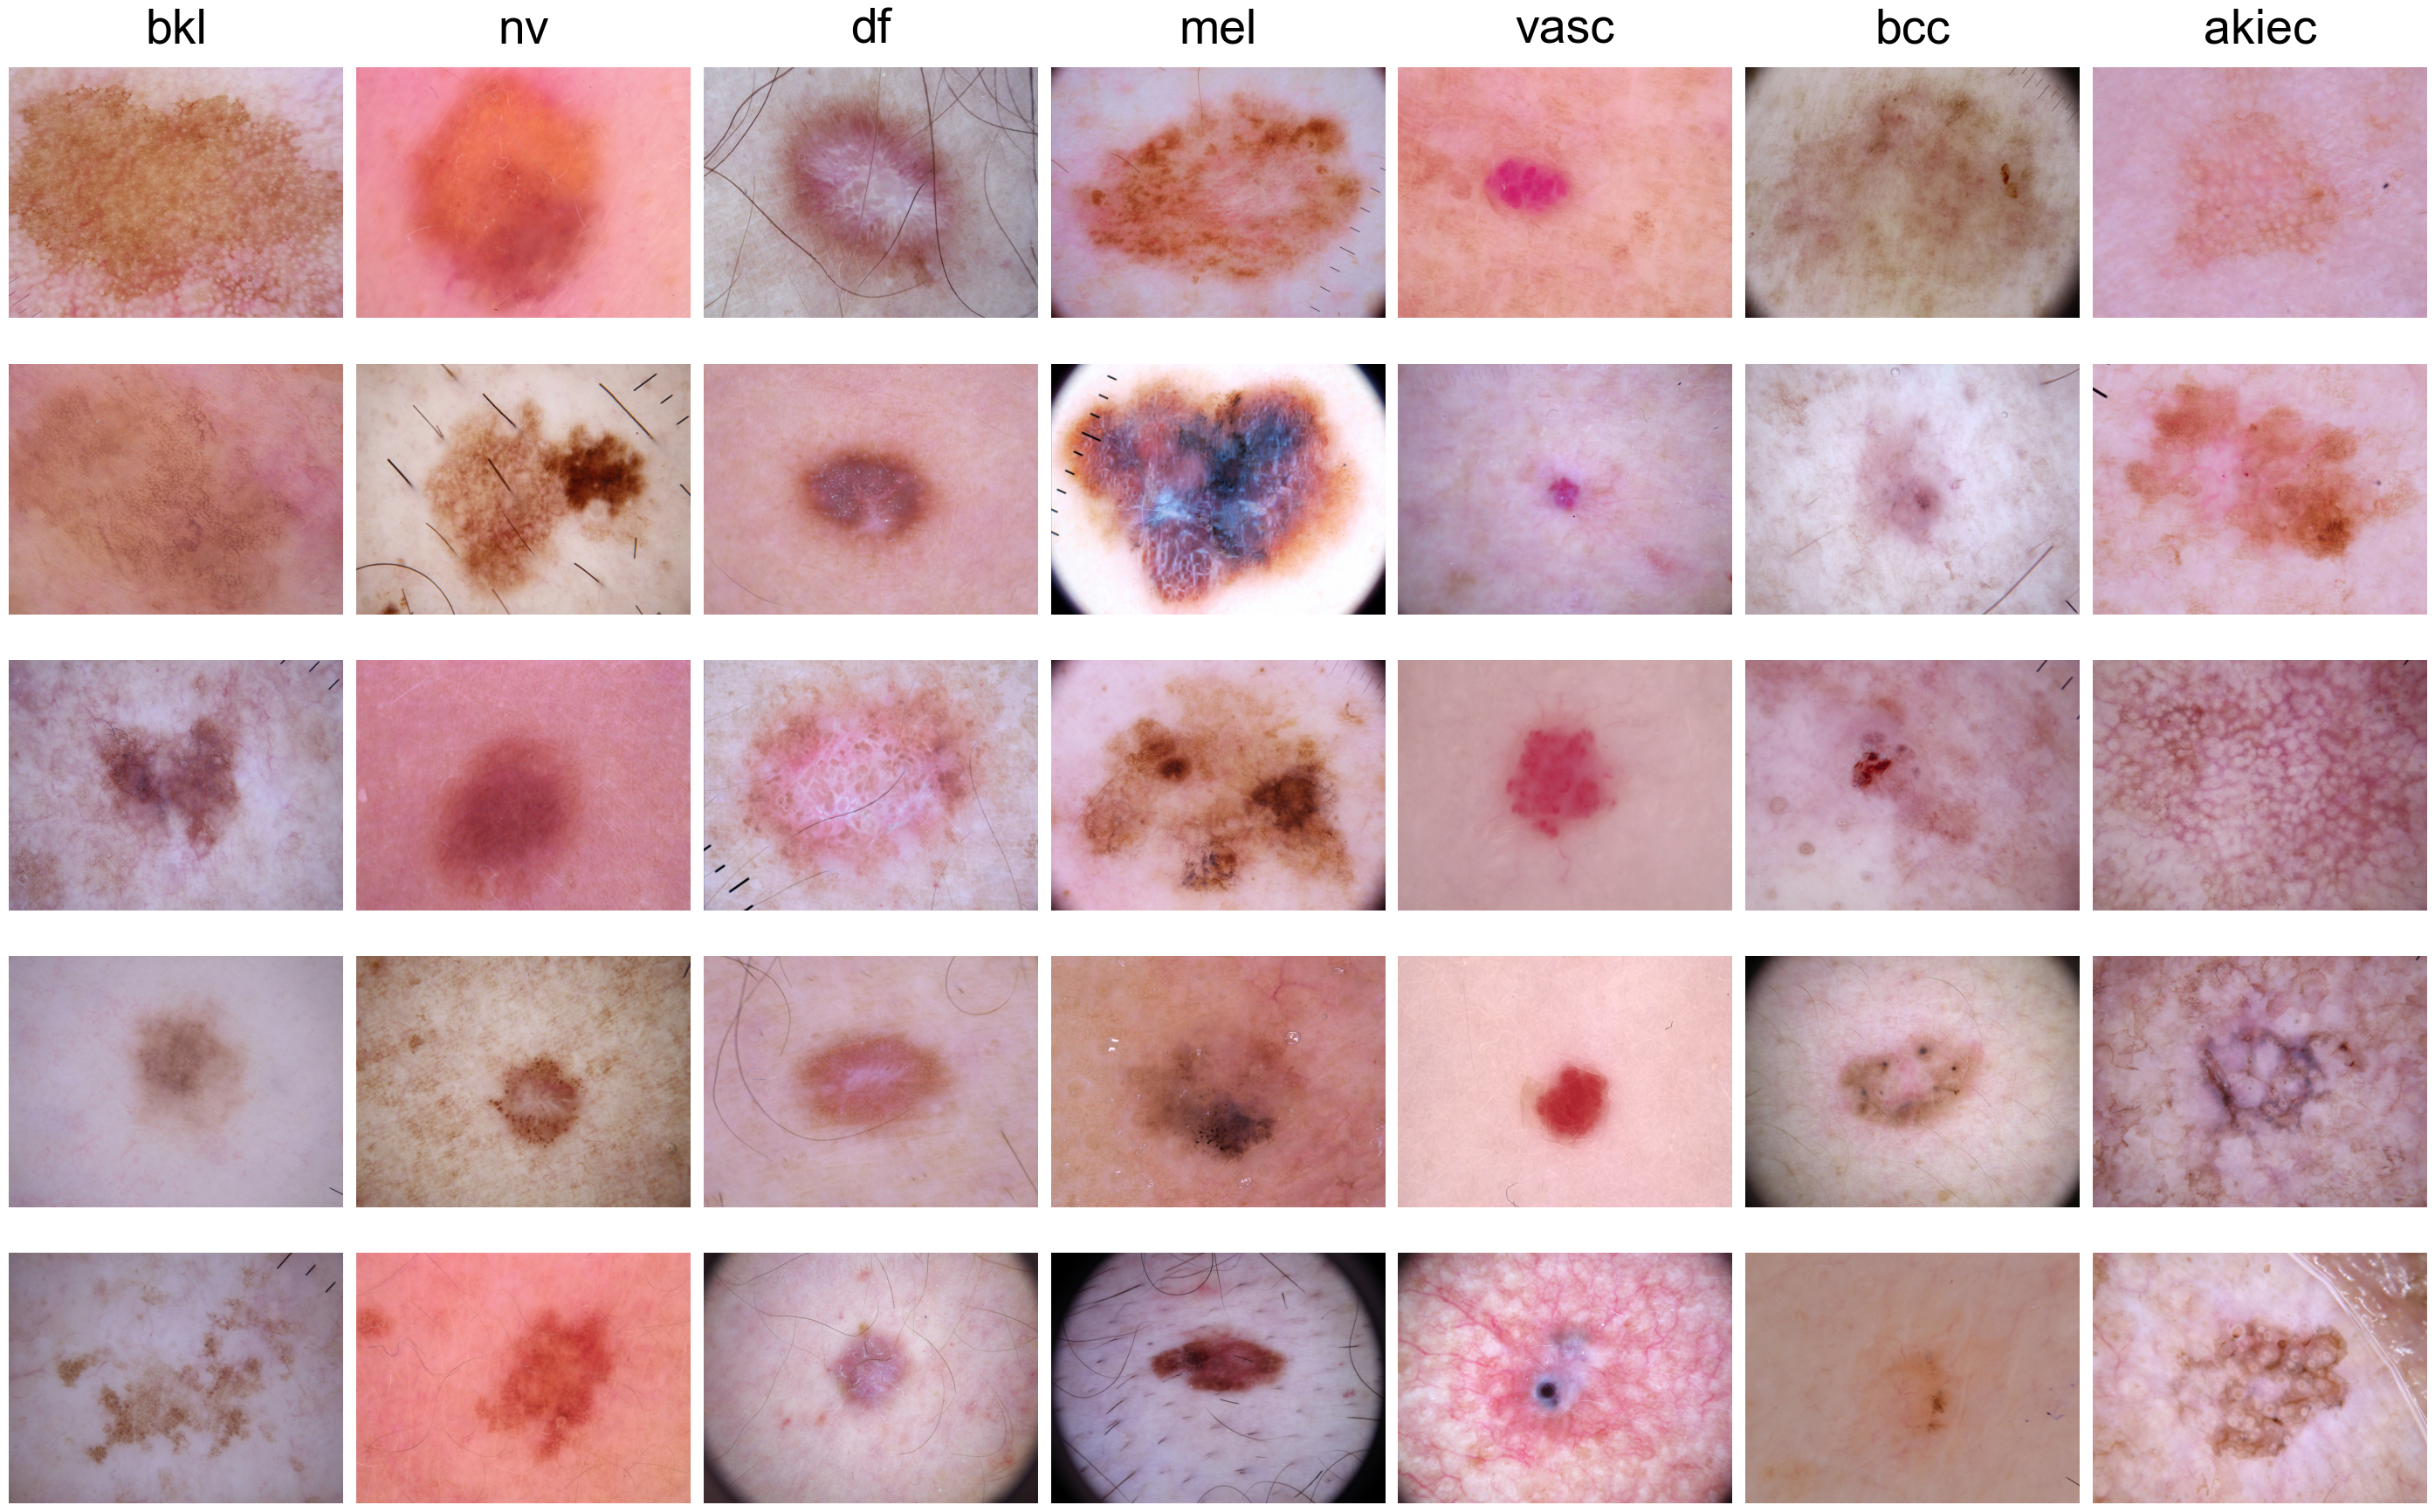

In [9]:

part_1_dir = r'F:\JHU\FALL2024\Pytorch\explainable_skinlesion_classification\HAM10000\HAM10000_images_part_1'
part_2_dir = r'F:\JHU\FALL2024\Pytorch\explainable_skinlesion_classification\HAM10000\HAM10000_images_part_2'

# Combine both directories 
image_dirs = [part_1_dir, part_2_dir]

def find_image(image_id, directories):

    for dir_path in directories:
        image_path = os.path.join(dir_path, f"{image_id}.jpg")
        if os.path.exists(image_path):
            return image_path
    return None

classes = df['dx'].unique()
num_samples = 5  # Number of samples per class
fig, axes = plt.subplots(num_samples, len(classes), figsize=(len(classes) * 4, 18))

# Loop through each class
for col_idx, lesion_class in enumerate(classes):
    class_samples = df[df['dx'] == lesion_class]
    random_samples = class_samples.sample(n=num_samples, random_state=42)

    # Loop through the n number of samples
    for row_idx, (_, sample) in enumerate(random_samples.iterrows()):
        image_path = find_image(sample['image_id'], image_dirs)
        if image_path:
            img = Image.open(image_path)
            axes[row_idx, col_idx].imshow(img)
            axes[row_idx, col_idx].axis('off')
        else:
            axes[row_idx, col_idx].set_title("Image Missing", fontsize=22)
            axes[row_idx, col_idx].axis('off')

    # Label
    axes[0, col_idx].set_title(
        lesion_class,
        pad=20,  
        size=40,  
        color="black"
    )


plt.tight_layout()
plt.show()